# Stable Diffusion with neuron: text to image

In [1]:
from optimum.neuron import NeuronStableDiffusionPipeline


model_id = "stabilityai/stable-diffusion-2-1"
input_shapes = {"batch_size": 1, "height": 768, "width": 768}

In [2]:
# Compile and save
stable_diffusion = NeuronStableDiffusionPipeline.from_pretrained(
    model_id, export=True, device_ids=[0, 1], **input_shapes
)
# Load already exported artifacts
# stable_diffusion = NeuronStableDiffusionPipeline.from_pretrained("sd_neuron_768/", device_ids=[0, 1])

save_directory = "sd_neuron_768/"
stable_diffusion.save_pretrained(save_directory)

The config attributes {'requires_safety_checker': False, 'safety_checker': [None, None]} were passed to NeuronStableDiffusionPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.


In [3]:
from diffusers import DPMSolverMultistepScheduler
stable_diffusion.scheduler = DPMSolverMultistepScheduler.from_config(stable_diffusion.scheduler.config)

In [5]:
# !pip install matplotlib

In [6]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import time
import copy
import numpy as np 

  0%|          | 0/50 [00:00<?, ?it/s]

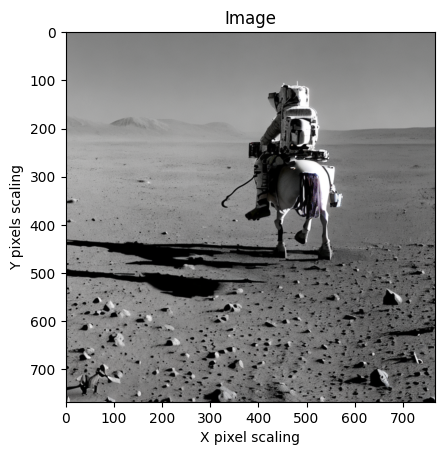

Average time:  54.76 seconds


In [9]:
# Run pipeline
prompt = [
    "a photo of an astronaut riding a horse on mars",
    # "sonic on the moon",
    # "elvis playing guitar while eating a hotdog",
    # "saved by the bell",
    # "engineers eating lunch at the opera",
    # "panda eating bamboo on a plane",
    # "A digital illustration of a steampunk flying machine in the sky with cogs and mechanisms, 4k, detailed, trending in artstation, fantasy vivid colors",
    # "kids playing soccer at the FIFA World Cup"
]


plt.title("Image")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")

total_time = 0
for x in prompt:
    start_time = time.time()
    image = stable_diffusion(x).images[0]
    total_time = total_time + (time.time()-start_time)
    image.save("image.png")
    image = mpimg.imread("image.png")
    #clear_output(wait=True)
    plt.imshow(image)
    plt.show()
print("Average time: ", np.round((total_time/len(prompt)), 2), "seconds")